# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Loading Data Set

In [ ]:
df = pd.read_csv('cust_data.csv')
df

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exploration of Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [ ]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [ ]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

## Dealing With Null-Values

In [ ]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df.isnull().sum().sum()

0

In [ ]:
df.isnull().sum()

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

# Data Visulatization To find Insights

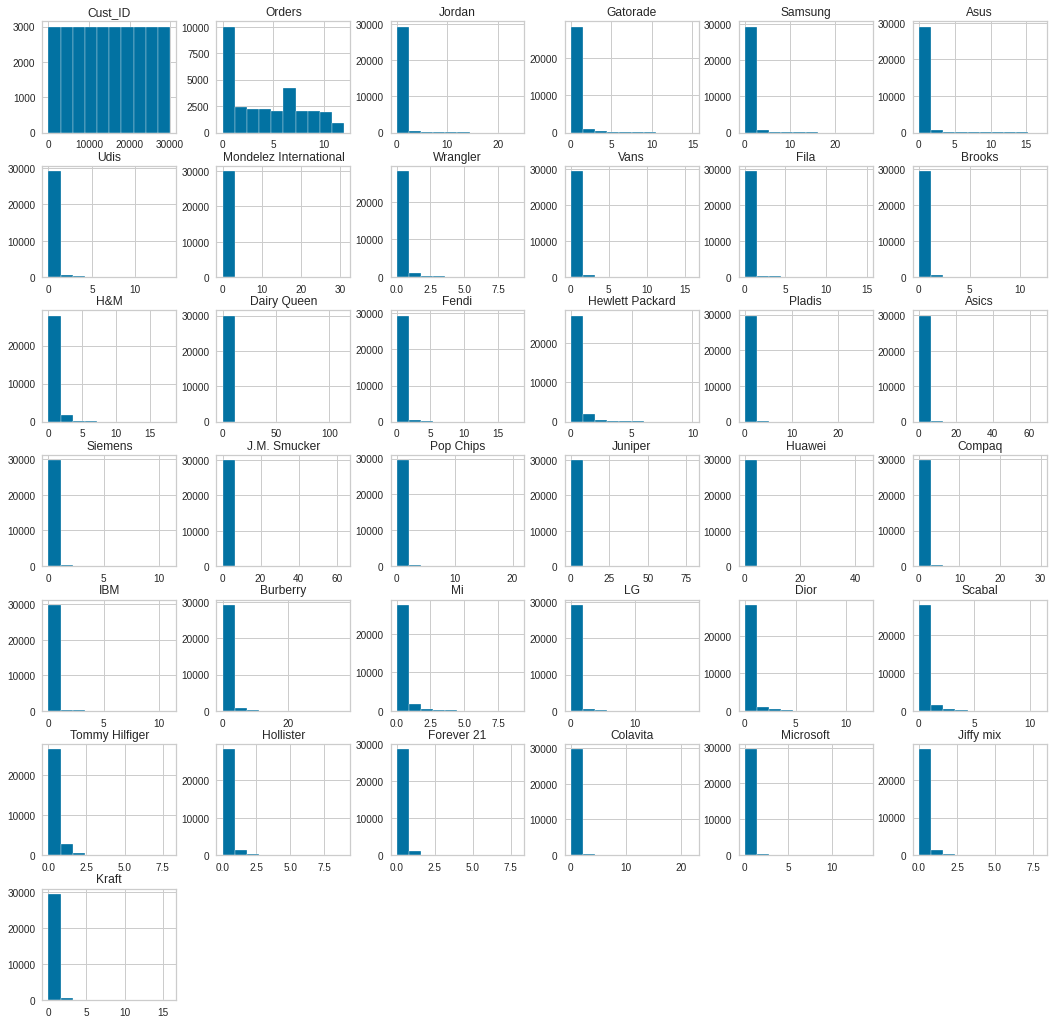

In [ ]:
fig = df.hist(figsize = (18,18))

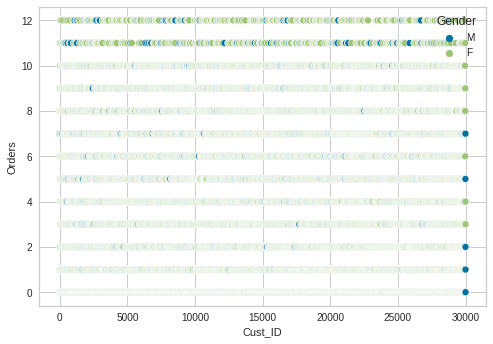

In [ ]:
sns.scatterplot(data=df, x="Cust_ID", y='Orders', hue="Gender")


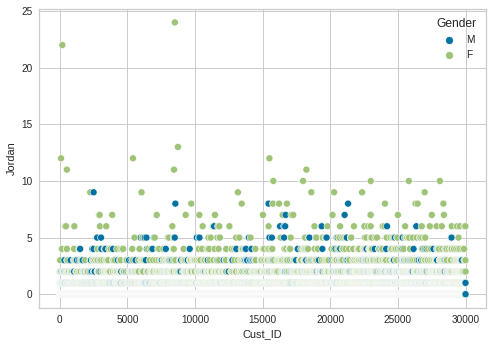

In [ ]:
sns.scatterplot(data=df, x="Cust_ID", y='Jordan', hue="Gender")

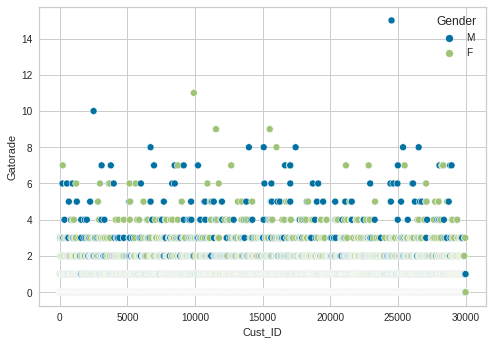

In [ ]:
sns.scatterplot(data=df, x="Cust_ID", y='Gatorade', hue="Gender")

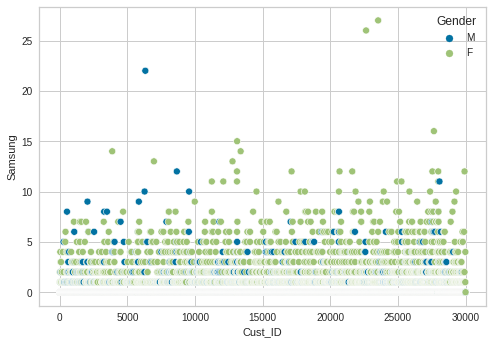

In [ ]:
sns.scatterplot(data=df, x="Cust_ID", y='Samsung', hue="Gender")

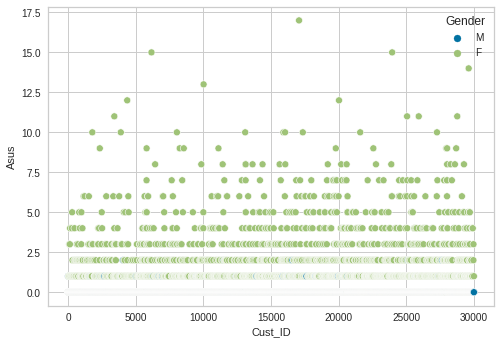

In [ ]:
sns.scatterplot(data=df, x="Cust_ID", y='Asus', hue="Gender")


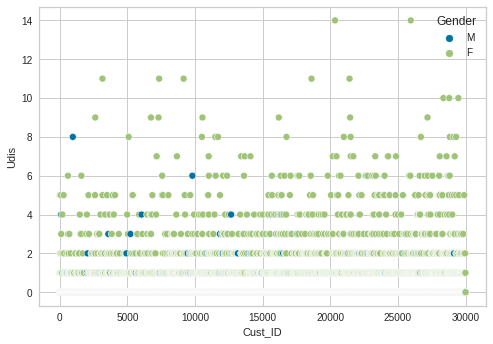

In [ ]:
sns.scatterplot(data=df, x="Cust_ID", y='Udis', hue="Gender")


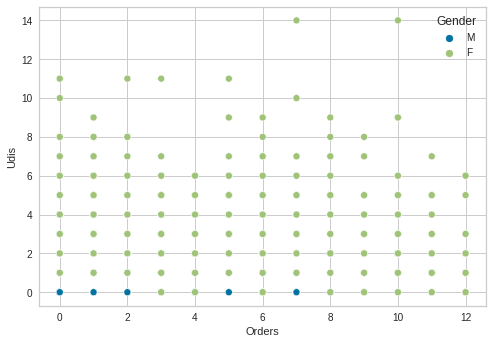

In [ ]:
sns.scatterplot(data=df, x="Orders", y='Udis', hue="Gender")

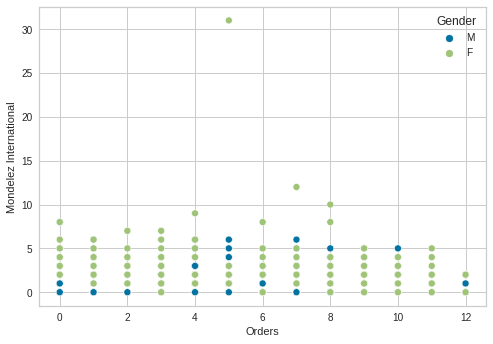

In [ ]:
sns.scatterplot(data=df, x="Orders", y='Mondelez International', hue="Gender")

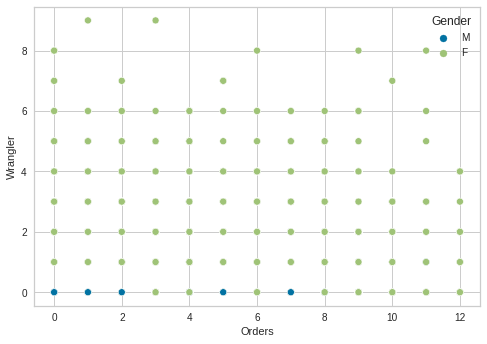

In [ ]:
sns.scatterplot(data=df, x="Orders", y='Wrangler', hue="Gender")

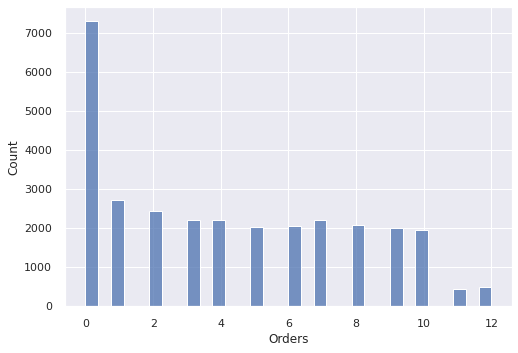

In [ ]:
sns.set(style="darkgrid")
sns.histplot(data = df,x = "Orders")

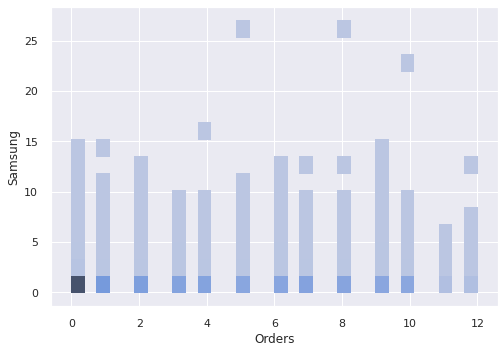

In [ ]:
sns.set(style="darkgrid")
sns.histplot(data = df,x='Orders',y = "Samsung")

{'whiskers': [<matplotlib.lines.Line2D at 0x7f124b0547c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f124ae89a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f124b054d60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f124ae89040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f124b04d6d0>],
 'means': []}

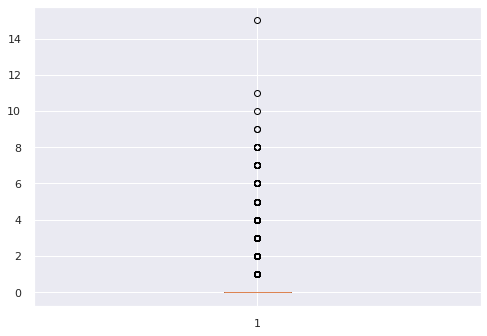

In [ ]:
plt.boxplot(df['Gatorade'].values)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f124b44edc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f124b44e7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f124a954880>],
 'medians': [<matplotlib.lines.Line2D at 0x7f124ae55340>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f124ae550a0>],
 'means': []}

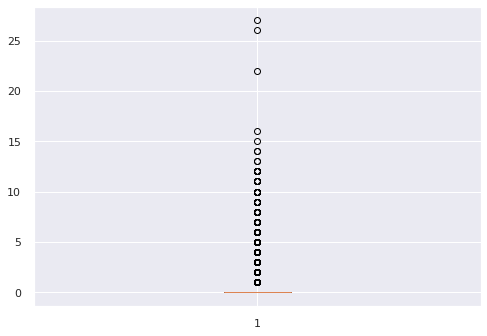

In [ ]:
plt.boxplot(df['Samsung'].values)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f124b182190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f124b182b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f124ae37730>],
 'medians': [<matplotlib.lines.Line2D at 0x7f124bc12ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f124bc12460>],
 'means': []}

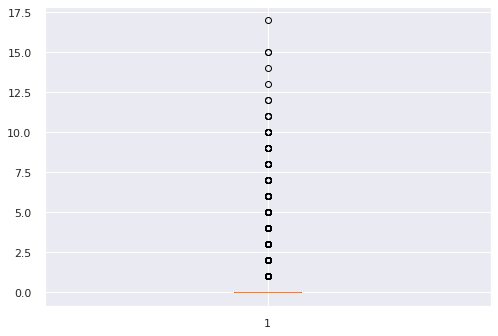

In [ ]:
plt.boxplot(df['Asus'].values)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f124afe3cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f124b1f3c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f124afe3040>],
 'medians': [<matplotlib.lines.Line2D at 0x7f124b1f38e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f124b1f3d00>],
 'means': []}

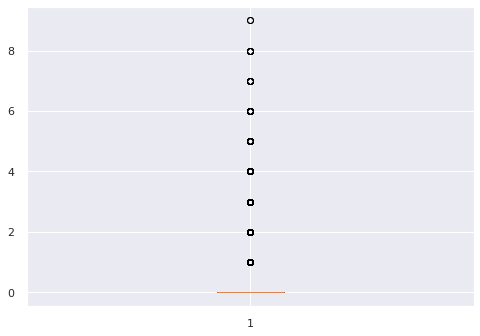

In [ ]:
plt.boxplot(df['Wrangler'].values)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f124b52cb80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f124b52c580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f124b52ceb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f124b09a670>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f124b09a790>],
 'means': []}

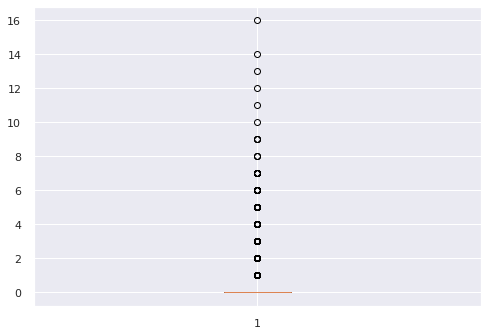

In [ ]:
plt.boxplot(df['Vans'].values)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f124bd05f70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f125b603070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f124bd05220>],
 'medians': [<matplotlib.lines.Line2D at 0x7f124bccd280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f124bccd8e0>],
 'means': []}

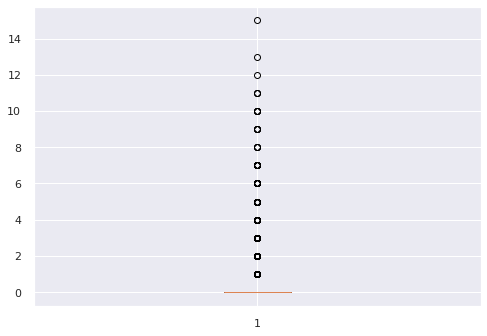

In [ ]:
plt.boxplot(df['Fila'].values)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f124b2fc280>,
 'caps': [<matplotlib.lines.Line2D at 0x7f124b2fcb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f124b219640>],
 'medians': [<matplotlib.lines.Line2D at 0x7f124addbe80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f124addb0d0>],
 'means': []}

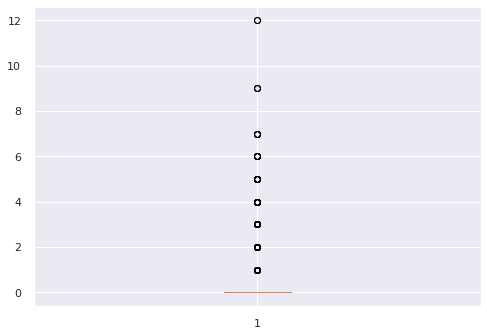

In [ ]:
plt.boxplot(df['Brooks'].values)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f124ae1f790>,
 'caps': [<matplotlib.lines.Line2D at 0x7f124adede20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f124ae1f340>],
 'medians': [<matplotlib.lines.Line2D at 0x7f124aded940>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f124adeaee0>],
 'means': []}

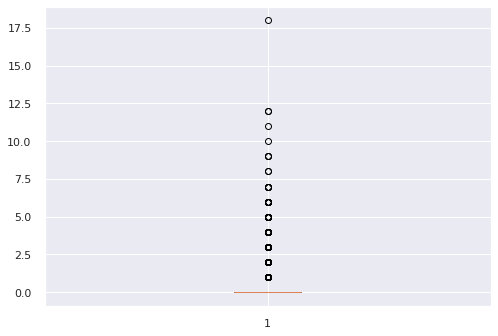

In [ ]:
plt.boxplot(df['Fendi'].values)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f124b0d4df0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f124b06a460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f124b0d4850>],
 'medians': [<matplotlib.lines.Line2D at 0x7f124b06afa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f124b06a790>],
 'means': []}

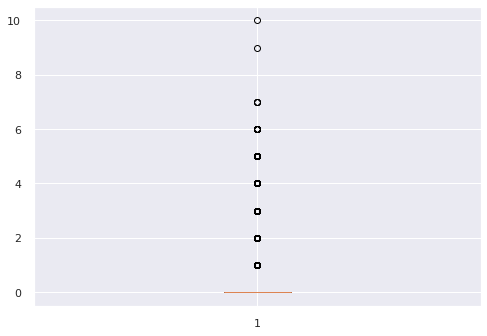

In [ ]:
plt.boxplot(df['Hewlett Packard'].values)

In [ ]:
df.columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')

In [ ]:
df.describe(percentiles = [0.01,0.02,0.03,0.04,0.05,0.25,0.5,0.75,0.95,0.96,0.97,0.98,0.99,1.0]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,95%,96%,97%,98%,99%,100%,max
Cust_ID,30000.0,15000.500000,8660.398374,1.0,300.99,600.98,900.97,1200.96,1500.95,7500.75,15000.5,22500.25,28500.05,28800.04,29100.03,29400.02,29700.01,30000.0,30000.0
Orders,30000.0,4.169800,3.590311,0.0,0.00,0.00,0.00,0.00,0.00,1.00,4.0,7.00,10.00,10.00,11.00,11.00,12.00,12.0,12.0
Jordan,30000.0,0.267433,0.804778,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,2.00,2.00,2.00,3.00,4.00,24.0,24.0
Gatorade,30000.0,0.252333,0.705368,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,2.00,2.00,2.00,2.00,3.00,15.0,15.0
Samsung,30000.0,0.222933,0.917494,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,2.00,2.00,3.00,5.00,27.0,27.0
Asus,30000.0,0.161333,0.740038,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,1.00,2.00,2.00,4.00,17.0,17.0
Udis,30000.0,0.143533,0.641258,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,1.00,1.00,2.00,3.00,14.0,14.0
Mondelez International,30000.0,0.139767,0.525840,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,1.00,1.00,2.00,2.00,31.0,31.0
Wrangler,30000.0,0.106933,0.515921,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,1.00,1.00,2.00,3.00,9.0,9.0
Vans,30000.0,0.111433,0.547990,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,1.00,1.00,2.00,2.00,16.0,16.0


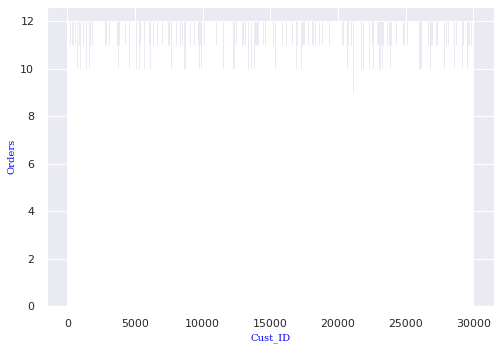

In [ ]:
plt.bar(df['Cust_ID'],df['Orders'],color = 'red')
font1 = {'family':'serif','color':'blue','size':10}
plt.xlabel("Cust_ID",fontdict=font1)
plt.ylabel("Orders",fontdict = font1)
plt.show()

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


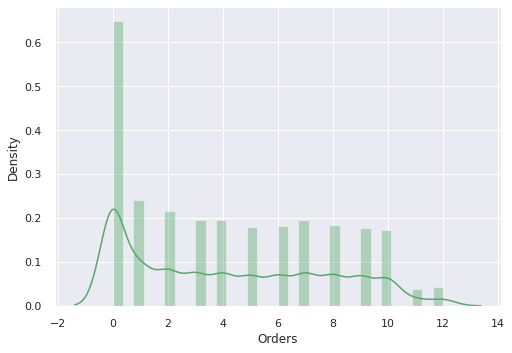

In [ ]:
sns.distplot(df['Orders'],color='g')

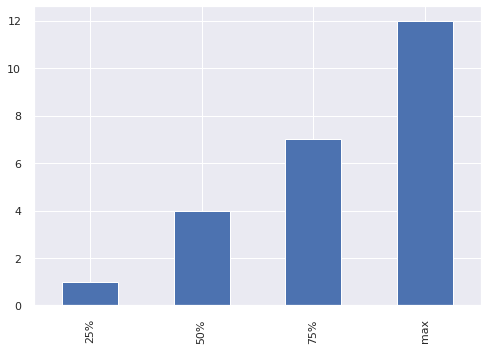

In [ ]:
df.Orders.describe()[4:].plot(kind='bar')

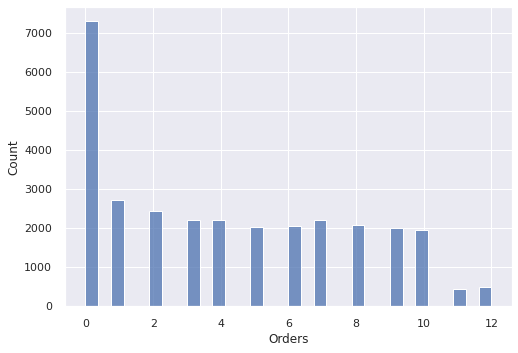

In [ ]:
sns.histplot(x='Orders', data=df)

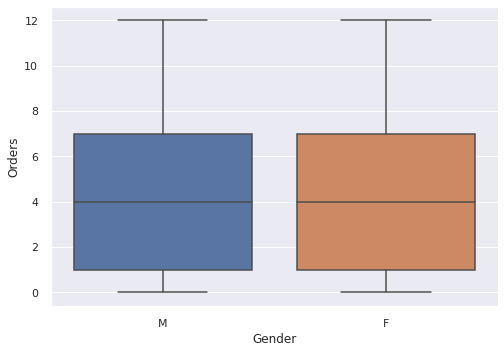

In [ ]:
sns.boxplot( x="Gender", y='Orders', data=df)

In [ ]:
df_1=pd.get_dummies(df,columns=['Gender'])
df_1.head()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,10,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,1,0


In [ ]:
df = df_1
df

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,10,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29996,29997,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29997,29998,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
29998,29999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_1.columns

Index(['Cust_ID', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft', 'Gender_F',
       'Gender_M'],
      dtype='object')

In [ ]:
data=df_1.drop(['Orders','Gender_F','Gender_M'],axis=1)
data.head()

,Cust_ID,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [ ]:
scale=StandardScaler()
data=scale.fit_transform(data)
data

array([[-1.73199307, -0.33231249, -0.35773869, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [-1.7318776 , -0.33231249,  1.05998399, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [-1.73176213, -0.33231249,  1.05998399, ...,  1.97870833,
        -0.22048554, -0.18277495],
       ...,
       [ 1.73176213, -0.33231249,  1.05998399, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [ 1.7318776 , -0.33231249, -0.35773869, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [ 1.73199307,  2.15288625, -0.35773869, ..., -0.26057832,
        -0.22048554, -0.18277495]])

In [ ]:
df_1.columns

Index(['Cust_ID', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft', 'Gender_F',
       'Gender_M'],
      dtype='object')

# K-Means Modelling

Method 1

In [ ]:
# Finding the Outliers in the Data

In [ ]:
Q1 = df_1.quantile(0.25)
Q3 = df_1.quantile(0.75)
IQR = Q3-Q1
((df_1 < (Q1 - 1.5 * IQR)) | (df > (Q3 +1.5 *IQR))).sum()

Cust_ID                      0
Orders                       0
Jordan                    4812
Gatorade                  4950
Samsung                   3100
Asus                      2403
Udis                      2412
Mondelez International    3083
Wrangler                  1836
Vans                      2015
Fila                      1590
Brooks                    3300
H&M                       6244
Dairy Queen               3197
Fendi                     3069
Hewlett Packard           2967
Pladis                    1949
Asics                     4414
Siemens                    923
J.M. Smucker              1991
Pop Chips                 5040
Juniper                   1181
Huawei                    4334
Compaq                    2347
IBM                        616
Burberry                  6880
Mi                        2460
LG                        1938
Dior                      5409
Scabal                     750
Tommy Hilfiger            3520
Hollister                 1676
Forever 

In [ ]:
# Removal or Clipping the Outliers
map_df=df.drop(columns=[ 'Gender_M','Gender_F'])
def cap_data(df):
    for col in df.columns:
      percentiles = df[col].quantile([0.01, 0.99]).values
      df[col] = np.clip(df[col], percentiles[0], percentiles[1])  
      
    return df

final_df=cap_data(map_df)

In [ ]:
# Inserting the Gender Column
extracted_col1=df['Gender_M']
final_df.insert(1,'Gender_M' ,extracted_col1)


extracted_col2=df['Gender_F']
final_df.insert(1,'Gender_F' ,extracted_col2)
final_df.columns

Index(['Cust_ID', 'Gender_F', 'Gender_M', 'Orders', 'Jordan', 'Gatorade',
       'Samsung', 'Asus', 'Udis', 'Mondelez International', 'Wrangler', 'Vans',
       'Fila', 'Brooks', 'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard',
       'Pladis', 'Asics', 'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper',
       'Huawei', 'Compaq', 'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal',
       'Tommy Hilfiger', 'Hollister', 'Forever 21', 'Colavita', 'Microsoft',
       'Jiffy mix', 'Kraft'],
      dtype='object')

In [ ]:
final_df.describe()

,Cust_ID,Gender_F,Gender_M,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000
mean,15000.500000,0.825933,0.174067,4.169800,0.252933,0.236633,0.203533,0.143133,0.123667,0.125333,...,0.087533,0.256233,0.366300,0.144533,0.069133,0.045100,0.179767,0.106567,0.079833,0.06120
std,8655.253255,0.379173,0.379173,3.590311,0.684086,0.602647,0.737106,0.573693,0.471643,0.393400,...,0.354601,0.619024,0.733764,0.421959,0.301480,0.207527,0.515874,0.358164,0.324135,0.29381
min,300.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,7500.750000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,15000.500000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,22500.250000,1.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,29700.010000,1.000000,1.000000,12.000000,4.000000,3.000000,5.000000,4.000000,3.000000,2.000000,...,2.000000,3.000000,4.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.00000


In [ ]:
# Type -1 Modelling Of K-Means No outlier Removal and Minmax Normalization

In [ ]:
df_type1=pd.read_csv("cust_data.csv")

#filling missing values in "Gender"
df_type1["Gender"]=df_type1["Gender"].fillna(value="M",limit=545)
df_type1["Gender"]=df_type1["Gender"].fillna(value="F",limit=2179)

#Dummying Gender
df_type1= pd.get_dummies(df_type1, prefix=['Gender'], columns=['Gender'])
print(df_type1.shape)

(30000, 39)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_mM = scaler.fit_transform(df)

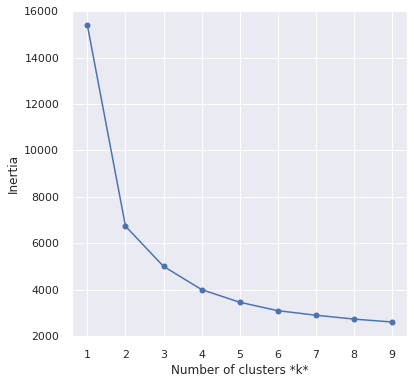

In [ ]:
inertias = []  # storer inertia for all values of k 
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_mM)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia');

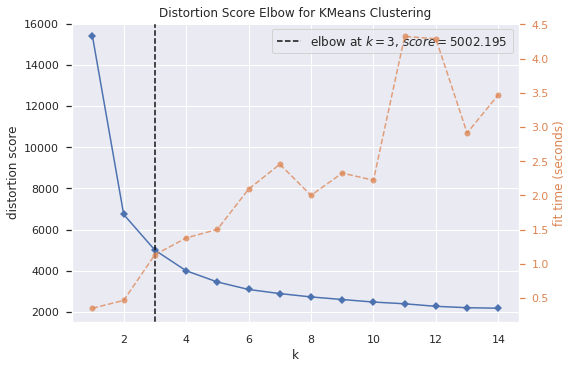

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
km = KMeans(random_state=42)

elb_visualizer = KElbowVisualizer(km, k=(1,15))
elb_visualizer.fit(X_mM)    
elb_visualizer.show() 

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = range(2,15)
sil=[]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X_mM)
    silhouette_avg = silhouette_score(X_mM, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sil.append(silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.6002734353246995
For n_clusters = 3 The average silhouette_score is : 0.3471658795662182
For n_clusters = 4 The average silhouette_score is : 0.3424870632035563
For n_clusters = 5 The average silhouette_score is : 0.34020274746786294
For n_clusters = 6 The average silhouette_score is : 0.2910329585681052
For n_clusters = 7 The average silhouette_score is : 0.2902146858512985
For n_clusters = 8 The average silhouette_score is : 0.24856338694904911
For n_clusters = 9 The average silhouette_score is : 0.2301640634309607
For n_clusters = 10 The average silhouette_score is : 0.23155575584530258
For n_clusters = 11 The average silhouette_score is : 0.2157657968549278
For n_clusters = 12 The average silhouette_score is : 0.2112053060261643
For n_clusters = 13 The average silhouette_score is : 0.20831576109699232
For n_clusters = 14 The average silhouette_score is : 0.1884245068790823


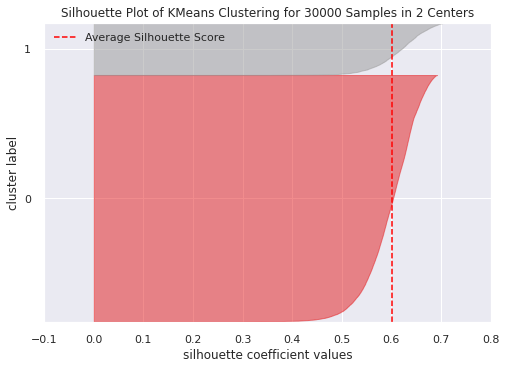

In [ ]:
minmax_2clust = KMeans(n_clusters = 2)

sil_visualizer = SilhouetteVisualizer(minmax_2clust)
sil_visualizer.fit(X_mM)    
sil_visualizer.show()

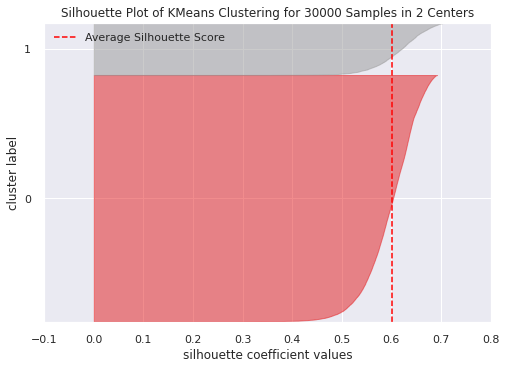

In [ ]:
minmax_3clust = KMeans(n_clusters = 3)

sil_visualizer = SilhouetteVisualizer(minmax_2clust)
sil_visualizer.fit(X_mM)    
sil_visualizer.show()

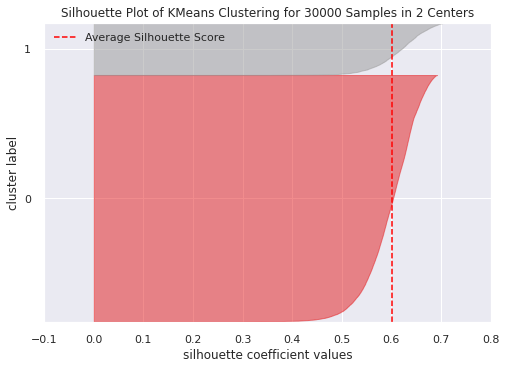

In [ ]:
minmax_4clust = KMeans(n_clusters = 4)

sil_visualizer = SilhouetteVisualizer(minmax_2clust)
sil_visualizer.fit(X_mM)    
sil_visualizer.show()

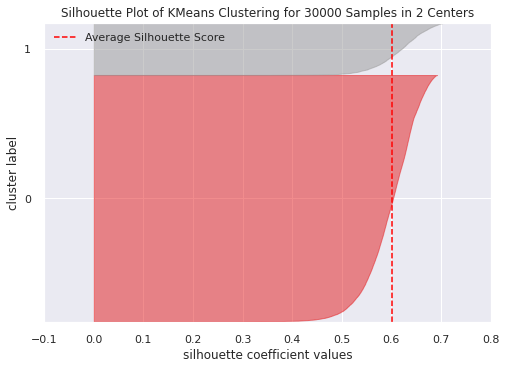

In [ ]:
minmax_5clust = KMeans(n_clusters = 5)

sil_visualizer = SilhouetteVisualizer(minmax_2clust)
sil_visualizer.fit(X_mM)    
sil_visualizer.show()

In [ ]:
#Modelling Type 2 -- Outliers Removed and Minmax Standadization Used

In [ ]:
#loading data
df=pd.read_csv("cust_data.csv")

#filling missing values in "Gender"
df["Gender"]=df["Gender"].fillna(value="M",limit=545)
df["Gender"]=df["Gender"].fillna(value="F",limit=2179)

#Dummying Gender
df= pd.get_dummies(df, prefix=['Gender'], columns=['Gender'])

#Dropping "Cust_ID"
df.drop(columns = ['Cust_ID'], inplace = True)

##outlier clipping##
#we create a df without Gender columns as their max(1.0) is equal to 1.0.
#after checking with the  description, we are about to clip the 0.99th percentie as outliers.
map_df=df.drop(columns=[ 'Gender_M','Gender_F'])
def cap_data(df):
    for col in df.columns:
      percentiles = df[col].quantile([0.01, 0.99]).values
      df[col] = np.clip(df[col], percentiles[0], percentiles[1])  
      
    return df
final_df=cap_data(map_df)

#inserting back the gender columns
extracted_col1=df['Gender_M']
final_df.insert(1,'Gender_M' ,extracted_col1)

extracted_col2=df['Gender_F']
final_df.insert(1,'Gender_F' ,extracted_col2)
print(final_df.shape)

(30000, 38)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_mM = scaler.fit_transform(final_df) 

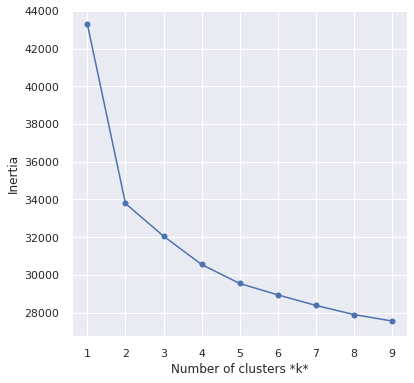

In [ ]:
inertias = []  # storer inertia for all values of k 
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_mM)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia');

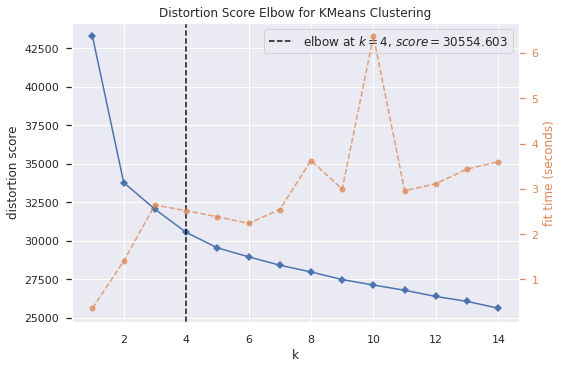

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
km = KMeans(random_state=42)

elb_visualizer = KElbowVisualizer(km, k=(1,15))
elb_visualizer.fit(X_mM)    
elb_visualizer.show() 

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = range(2,15)
sil=[]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X_mM)
    silhouette_avg = silhouette_score(X_mM, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sil.append(silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.30328805812287074
For n_clusters = 3 The average silhouette_score is : 0.2951389105909514
For n_clusters = 4 The average silhouette_score is : 0.11939507251273745
For n_clusters = 5 The average silhouette_score is : 0.12480961581938675
For n_clusters = 6 The average silhouette_score is : 0.11700089709224433
For n_clusters = 7 The average silhouette_score is : 0.12205698444789262
For n_clusters = 8 The average silhouette_score is : 0.09570096114528931
For n_clusters = 9 The average silhouette_score is : 0.09142907981873774
For n_clusters = 10 The average silhouette_score is : 0.07115281048980279
For n_clusters = 11 The average silhouette_score is : 0.09183817720455176
For n_clusters = 12 The average silhouette_score is : 0.07682842773571054
For n_clusters = 13 The average silhouette_score is : 0.07525580010871548
For n_clusters = 14 The average silhouette_score is : 0.07312996884018982


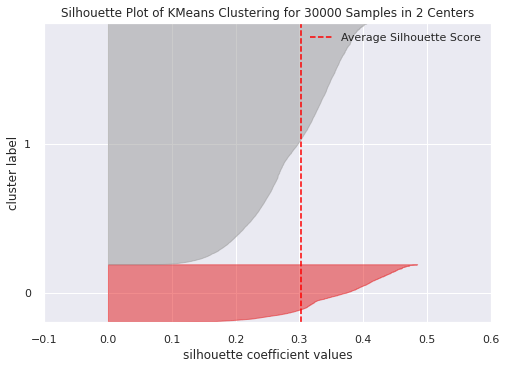

In [ ]:
minmax_2clust = KMeans(n_clusters = 2)
sil_visualizer = SilhouetteVisualizer(minmax_2clust)
sil_visualizer.fit(X_mM)    
sil_visualizer.show()
     

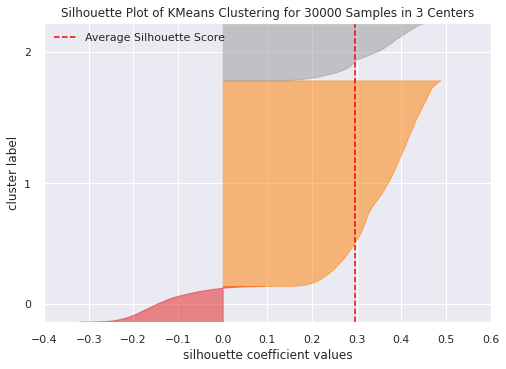

In [ ]:
minmax_3clust = KMeans(n_clusters = 3)
sil_visualizer = SilhouetteVisualizer(minmax_3clust)
sil_visualizer.fit(X_mM)    
sil_visualizer.show()
     

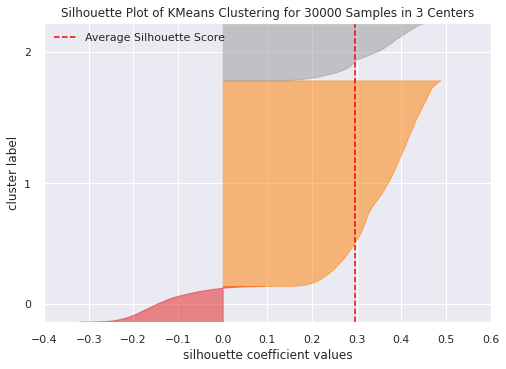

In [ ]:
minmax_4clust = KMeans(n_clusters = 4)
sil_visualizer = SilhouetteVisualizer(minmax_3clust)
sil_visualizer.fit(X_mM)    
sil_visualizer.show()
     

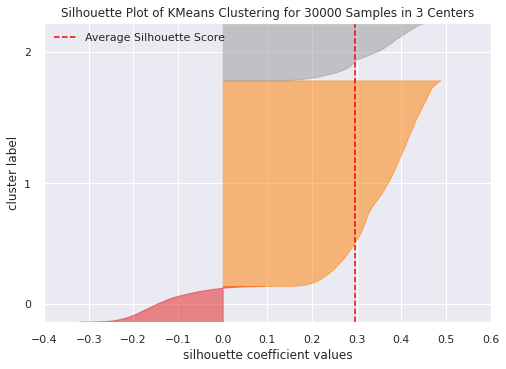

In [ ]:
minmax_5clust = KMeans(n_clusters = 5)
sil_visualizer = SilhouetteVisualizer(minmax_3clust)
sil_visualizer.fit(X_mM)    
sil_visualizer.show()
     

Method 3 Using the KElbowVisualizer

In [ ]:
X=pd.DataFrame(data,columns=df_1.columns[1:37])
X

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-1.731993,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-1.731878,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-1.731762,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-1.731647,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-1.731531,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.731531,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29996,1.731647,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29997,1.731762,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,1.621530,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29998,1.731878,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775


In [ ]:
X

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-1.731993,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-1.731878,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-1.731762,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-1.731647,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-1.731531,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.731531,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29996,1.731647,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29997,1.731762,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,1.621530,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29998,1.731878,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775


In [ ]:
n_clusters=[2,3,4,5]
for k in n_clusters:
    cluster=KMeans(n_clusters=k,random_state=10)
    predict=cluster.fit_predict(X)
    score=silhouette_score(X,predict,random_state=10)
    print ("For n_clusters = {}, silhouette score is{})".format(k, score))

For n_clusters = 2, silhouette score is0.4134624193949007)
For n_clusters = 3, silhouette score is0.2721907447079684)
For n_clusters = 4, silhouette score is0.2609059785654815)
For n_clusters = 5, silhouette score is0.2567784383335677)


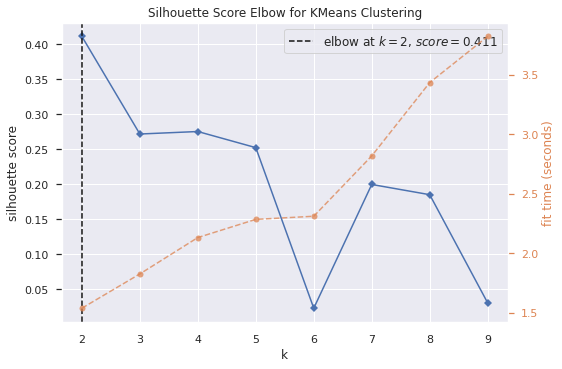

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
# Method 4 Using Blobs Library

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=30000, n_features=35, centers=4, random_state=10)
for n_clusters in range(3,8):
    km=KMeans(n_clusters=n_clusters, random_state=10)
    result=km.fit_predict(X)
       
    score=silhouette_score(X,result,random_state=10)
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 3, silhouette score is 0.6214665771968824)
For n_clusters = 4, silhouette score is 0.7973718598449924)
For n_clusters = 5, silhouette score is 0.6033460180865866)
For n_clusters = 6, silhouette score is 0.4093496625000387)
For n_clusters = 7, silhouette score is 0.21376150086431223)


For n_clusters = 2, silhouette score is 0.4973726949479975)
For n_clusters = 3, silhouette score is 0.6214665771968824)
For n_clusters = 4, silhouette score is 0.7973718598449924)
For n_clusters = 5, silhouette score is 0.6033460180865866)
For n_clusters = 6, silhouette score is 0.4093496625000387)
For n_clusters = 7, silhouette score is 0.21376150086431223)


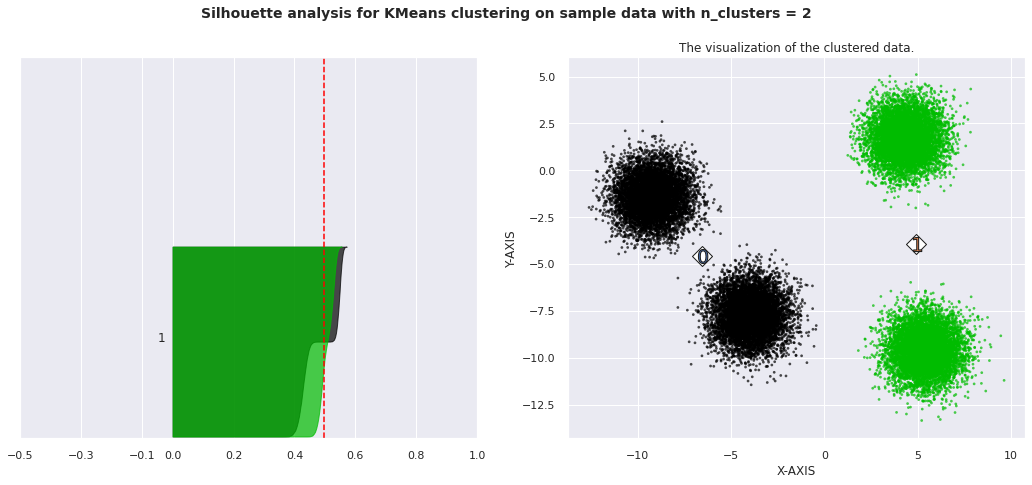

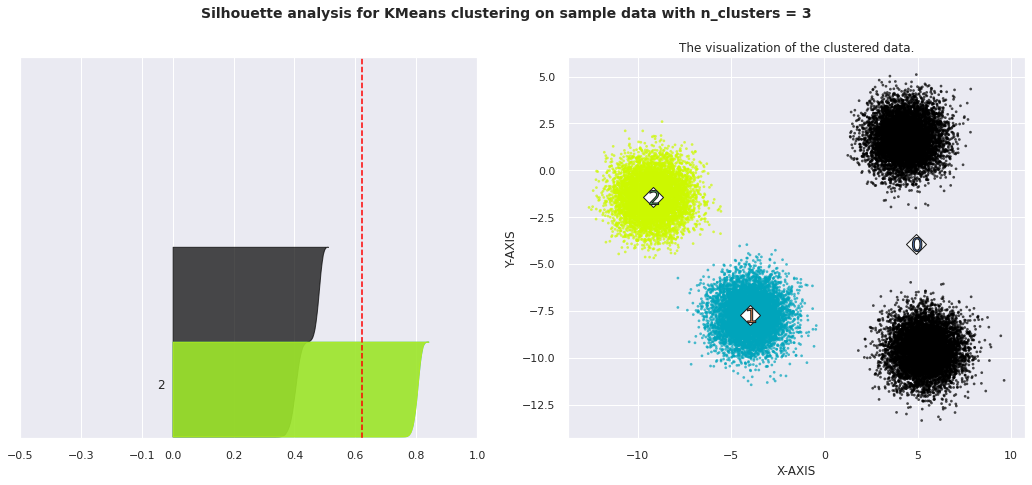

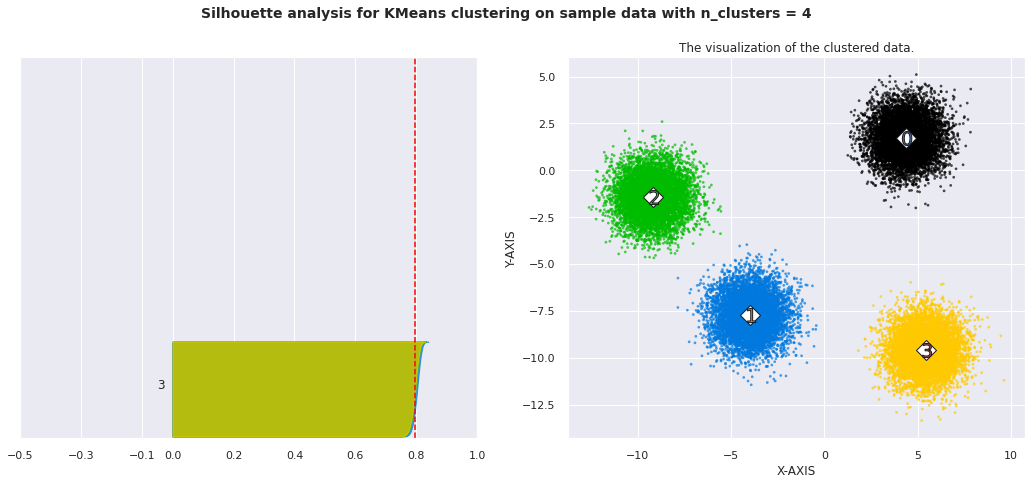

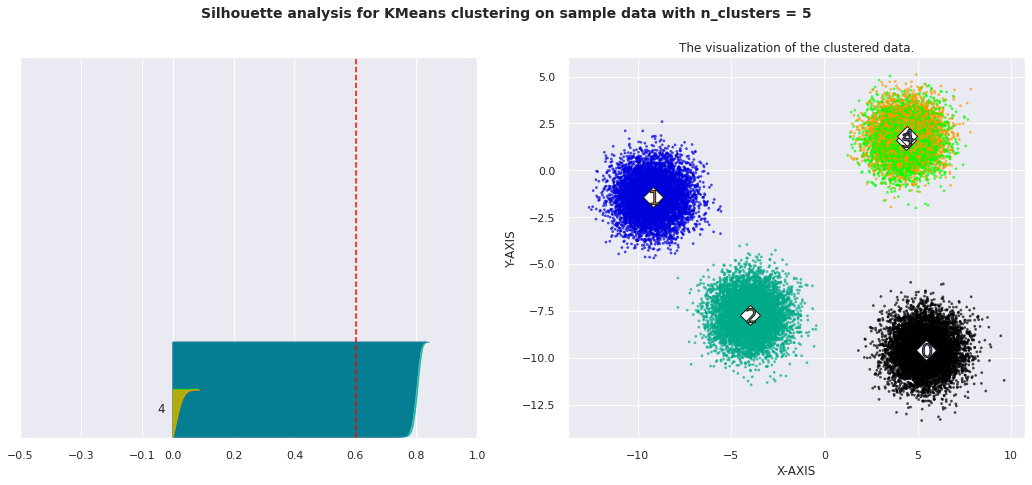

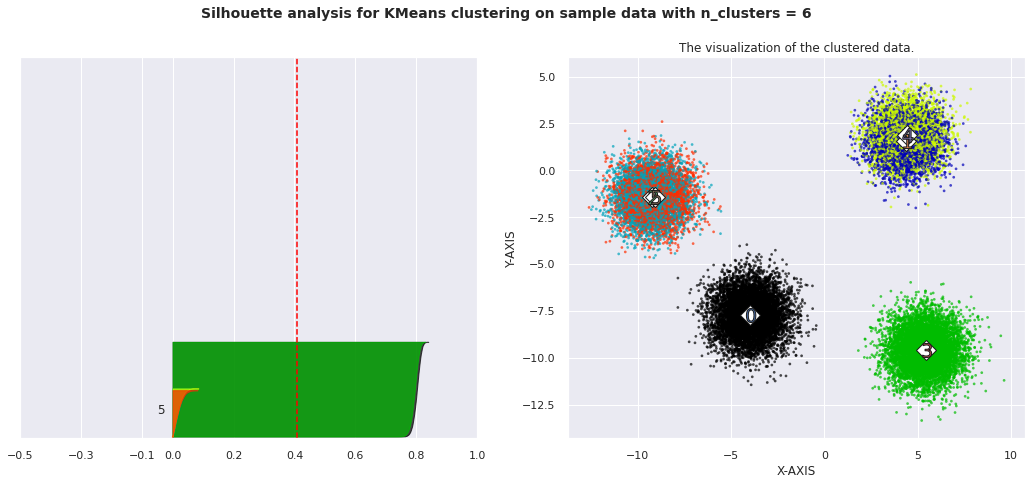

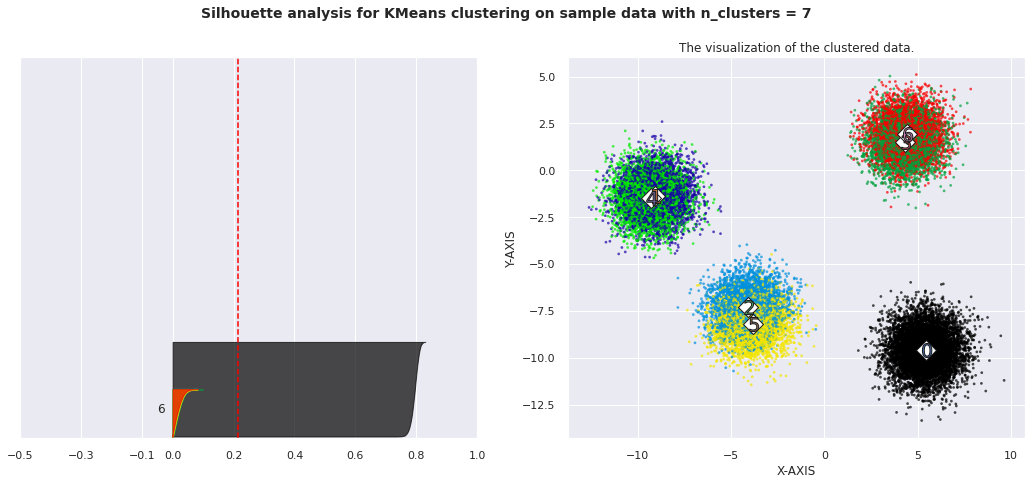

In [ ]:
#STEP 01:
X, y = make_blobs(n_samples=30000, n_features=35, centers=4, random_state=10)
for n_clusters in range(2,8):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.5, 1])              
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 20])  
    km=KMeans(n_clusters=n_clusters, random_state=10)          
    score=silhouette_score(X,result,random_state=10)
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
# STEP 02:

    # Calculating the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, result)

    y_lower = 100
    for i in range(n_clusters):
        # Adding the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[result == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=score, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.5, -0.3, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(result.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    centers = km.cluster_centers_

    # Draw white diamond markers at the cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="D",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )
#STEP 03:
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=200, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("X-AXIS")
    ax2.set_ylabel("Y-AXIS")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [ ]:
# Assigning the Cluster Number to the Data Points in the Dataset

In [ ]:
model = KMeans(4)
cluster = model.fit_predict(X)  

In [ ]:
X

array([[ -3.02172499,  -6.2821364 ,   5.26929807, ...,  -5.288518  ,
         -3.64839867,   3.473388  ],
       [ -8.6280557 ,  -0.07275704,  -4.25315178, ...,  -8.16417634,
         -1.49528334,   4.22971316],
       [ -6.77418279,  -1.14231677,  -4.6646495 , ...,  -8.78718647,
         -1.65189261,   5.32524855],
       ...,
       [  4.87310021,   0.91757536, -11.21097312, ...,  -0.77252417,
         -9.13895174,   7.43869463],
       [ -4.17931136,  -8.18922409,   6.1190983 , ...,  -1.99532222,
         -2.48689456,   4.46784035],
       [ -9.73833256,  -1.23618946,  -2.29093076, ...,  -9.01992071,
         -1.07028401,   5.12834258]])

In [ ]:
X.columns

Index(['Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft'],
      dtype='object')

In [ ]:
cluster_df=pd.DataFrame(X,columns=df.columns)
cluster_df

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M
0,-1.731993,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,...,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,NaN,NaN
1,-1.731878,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,NaN,NaN
2,-1.731762,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775,NaN,NaN
3,-1.731647,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,NaN,NaN
4,-1.731531,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.731531,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,NaN,NaN
29996,1.731647,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,NaN,NaN
29997,1.731762,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,1.621530,-0.177332,...,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,NaN,NaN
29998,1.731878,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,NaN,NaN


In [ ]:
cluster_df['cluster'] = cluster
cluster_df.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M,cluster
0,-1.731993,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,...,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,NaN,NaN,0
1,-1.731878,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,NaN,NaN,2
2,-1.731762,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775,NaN,NaN,2
3,-1.731647,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,NaN,NaN,1
4,-1.731531,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151,NaN,NaN,1


Text(0.5, 1.0, 'Size of clusters')

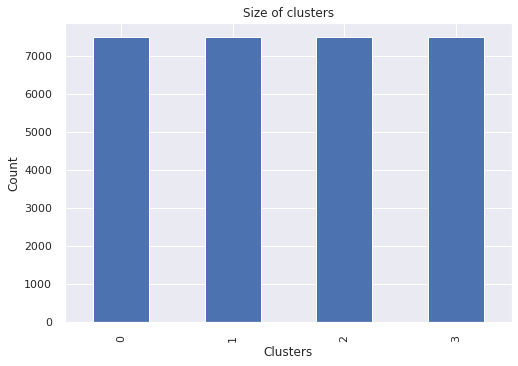

In [ ]:

cluster_df.cluster.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.title('Size of clusters')


Text(0.5, 1.0, 'Size of clusters')

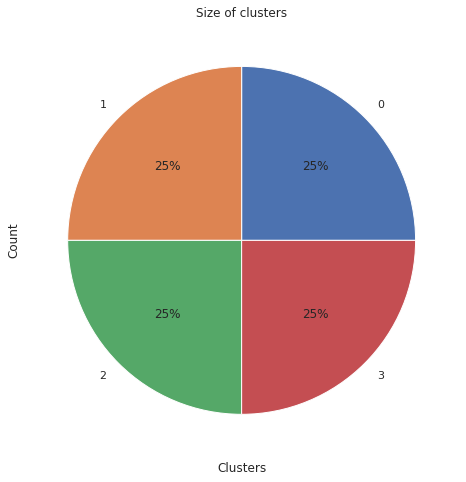

In [ ]:

plt.figure(figsize=(8,8))
cluster_df.cluster.value_counts().sort_index().plot(kind='pie',autopct='%1.0f%%')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.title('Size of clusters')
     